In [2]:
import spacy
from spacy import displacy
from collections import Counter
#! python3 -m spacy download en_core_web_lg
import en_core_web_lg
nlp = en_core_web_lg.load()

In [22]:
def display_labels(string):
    doc = nlp(string)
    displacy.render(doc, jupyter=True, style='ent') 
    labels = [x.label_ for x in doc.ents]
    art_labels = [x.label_ for x in doc.ents]
    art_ent = [x.text for x in doc.ents]
    art_token = [nlp(item) for item in Counter(art_ent)]
    #Counter(labels)
    
display_labels("Jews, Japanese, Democrat, Senator, Muslims, African")

In [4]:
#! python3 -m nltk.downloader wordnet
#! python3 -m nltk.downloader omw
#! pip3 install spacy-wordnet

#from spacy_wordnet.wordnet_annotator import WordnetAnnotator
#nlp.add_pipe(WordnetAnnotator(nlp.lang), after='tagger')

In [5]:
def wordnet_test(art, com):
    doc1 = nlp(art)
    art_labels = [x.label_ for x in doc1.ents]
    art_ent = [x.text for x in doc1.ents]
    art_token = [nlp(item) for item in Counter(art_ent)]
    
    doc2 = nlp(com)
    com_labels = [x.label_ for x in doc2.ents]
    com_ent = [x.text for x in doc2.ents]
    com_token = [nlp(item) for item in Counter(com_ent)]
    
    for token in Counter(com_token):
    
        #initialize list of scores
        scores = []
        
        #for each article item
        for art_word in art_token:
            
            #add similarity score to list of scores
            scores += [art_word.similarity(token)]
        
        #output for each comment
        print(token)
        print(scores)
        
        #print(max(scores))
        #print(art_token[scores.index(max(scores))])
        #print(min(scores))
        #print(art_token[scores.index(min(scores))])
        #print(sum(scores)/len(art_token))
        print()

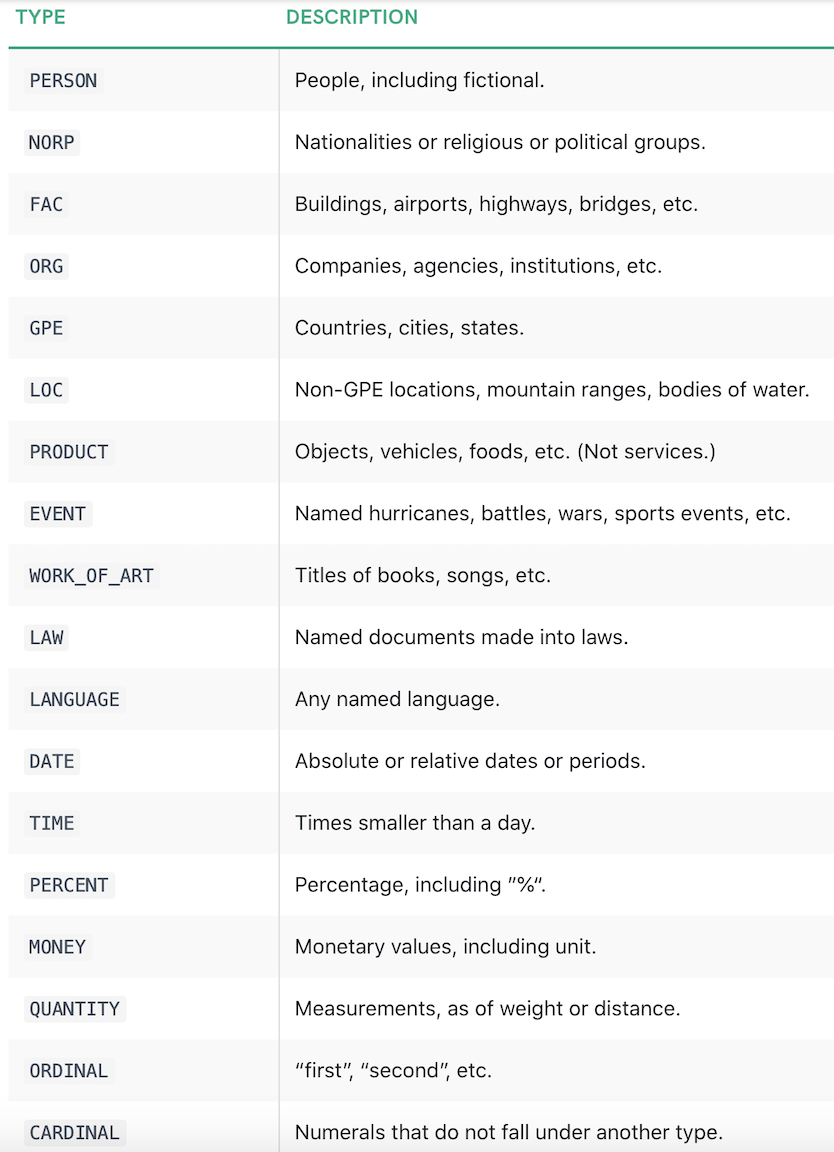

# Person
People, including fictional

In [32]:
wordnet_test("Donald Trump", "Barack Obama, Kim Kardashian, Mike Pence, Melania Trump, John Smith, Travis Scott, Joe Random")

Barack Obama
[0.5334676252404668]

Kim Kardashian
[0.4504260718362332]

Mike Pence
[0.4351032715695742]

Melania Trump
[0.8384423682450363]

John Smith
[0.6110572835332823]

Travis Scott
[0.5760028590448542]

Joe Random
[0.43989887951828693]



Noticing that two people always have at least 43% correlation. Kim Kardashian has higher correlation with Donald Trump than Mike Pence does, so wordnet seems to struggle with names.

# NORP
Nationalities or religious or political groups

In [84]:
wordnet_test("American", "Jews, Japanese, Democrat, Muslims, African")

Jews
[0.4667517498665019]

Japanese
[0.604758328302654]

Democrat
[0.39543702936094594]

Muslims
[0.38045687643037357]

African
[0.7008673540802459]



In [85]:
wordnet_test("Chinese", "Jews, Japanese, Democrat, Muslims, African")

Jews
[0.33359066765840284]

Japanese
[0.7312758980151478]

Democrat
[0.22285481465540183]

Muslims
[0.34313576750304026]

African
[0.5402243990949142]



In [86]:
wordnet_test("Jews", "Jews, Japanese, Democrat, Muslims, African")

Jews
[1.0]

Japanese
[0.2539596736208239]

Democrat
[0.40266081471370535]

Muslims
[0.7753535439504883]

African
[0.4278054934884824]



Much lower base correlation. Perhaps around 25%?

# FAC
Buildings, airports, highways, bridges, etc.

In [12]:
doc = nlp("Golden Gate Bridge, JFK International Airport, Willis Tower, Eiffel Tower, Tower Bridge")
displacy.render(doc, jupyter=True, style='ent') 
labels = [x.label_ for x in doc.ents]
art_labels = [x.label_ for x in doc.ents]
art_ent = [x.text for x in doc.ents]
art_token = [nlp(item) for item in Counter(art_ent)]
#Counter(labels)
wordnet_test("Golden Gate Bridge", "JFK International Airport, Willis Tower, Eiffel Tower, Tower Bridge, Brooklyn Bridge")

JFK International Airport
[0.376878968034727]

Willis Tower
[0.4875663134822733]

Eiffel Tower
[0.49339649802567326]

Tower Bridge
[0.7867382626992248]

Brooklyn Bridge
[0.6741152250530978]



35% base

# ORG
Companies, agencies, institutions, etc.

In [24]:
display_labels("BlackRock, Goldman Sachs, FBI, CIA, Amazon, Alibaba, Mossad")
wordnet_test("FBI", "Goldman Sachs, FBI, CIA, Amazon, Alibaba, Mossad")

Goldman Sachs
[0.42975856399496876]

FBI
[1.0]

CIA
[0.6899508346764718]

Amazon
[0.2934226479247935]

Alibaba
[0.19839302880376666]

Mossad
[0.5035012800517468]



Low base correlation, 7.5%

# GPE
Countries, cities, states

In [30]:
display_labels("Illinois, Louisisana, Japan, Chicago, Palestine")
wordnet_test("Illinois", "Louisisana, Japan, Chicago, Palestine, Alabama, Myanmar")

Louisisana
[0.0]

Japan
[0.3987403152528596]

Chicago
[0.8000993864635373]

Palestine
[0.3109933325633354]

Alabama
[0.7581954568838031]

Myanmar
[0.21897459809325265]



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.


20% base correlation

# LOC
Non-GPE locations, mountain ranges, bodies of water

In [40]:
display_labels("Rocky Mountains, Mississippi River, Nile River, Mount Everest, Indian Ocean")
wordnet_test("Mount Vesuvius", "Mississippi River, Nile River, Mount Everest, Indian Ocean")

Mississippi River
[0.2111384820716213]

Nile River
[0.20007046025365105]

Mount Everest
[0.6835917797296946]

Indian Ocean
[0.16041379827026278]



15% base

# Product
Objects, vehicles, foods, etc. (Not services)

In [61]:
display_labels("Cell phone")

Can't find any examples of this, so assuming 0% correlation

# Event
Named hurricanes, battles, wars, sports events, etc.

In [68]:
display_labels("Hurricane Katrina, Super Bowl, World War 2, Hurricane Sandy")
wordnet_test("World War 1", "Super Bowl, World War 2, Hurricane Sandy")

Super Bowl
[0.3400398188131638]

World War 2
[0.9805881086483661]

Hurricane Sandy
[0.2513564331218047]



20% correlation

# Work_of_art
Titles of books, songs, etc.

In [164]:
display_labels("The Mona Lisa, The Passion of Christ")

Can't find examples, assuming 0% base

# Law
Named documents made into law

In [90]:
display_labels("Civil Rights Act, Social Security Act, Fair Employment Act")
wordnet_test("Civil Rights Act", "Social Security Act, Fair Employment Act")

Social Security Act
[0.7483122662854761]



Too few examples, will leave 0% base

# Language
Any named language

In [98]:
display_labels("English, Hebrew, Yiddish, Mandarin")
wordnet_test("Yiddish", "Hebrew, Yiddish, Mandarin, English, Arabic")

Hebrew
[0.5507911937564709]

Yiddish
[1.0]

Mandarin
[0.22757127451661313]

English
[0.3405279732866326]

Arabic
[0.4071228033312809]



20% base correlation

# Date
Absolute or relative dates or periods

In [110]:
display_labels("October 21st 1997, March 14th 2005, December 25 1880")
wordnet_test("October 21st 1997", "March 14th 2005, December 25 1880")

March 14th 2005
[0.8376075331118343]

December 25 1880
[0.6514745847907986]



40% base

# Time
Times smaller than a day

In [124]:
display_labels(" five minutes, one hour, three hours, an hour and a half")
wordnet_test("five minutes", "one hour, three hours, an hour and a half, 20 hours")

one hour
[0.787236353062825]

three hours
[0.8703807400383875]

an hour and a half, 20 hours
[0.7732816620958108]



60% base

# Percent
Percentage, including "%".

In [128]:
display_labels("69%, 100%, 0%, 1%")
wordnet_test("0%", "100%, 0%, 1%, 69%")

100%
[0.7966786264372024]

0%
[1.0]

1%
[0.8811126342153869]

69%
[0.8114732806166244]



80% base

# Money
Monetary values, including unit.

In [139]:
display_labels("10 dollars, 1000 euros, 25 yuan, 69 pesos")
wordnet_test("10 dollars", "1000 euros, 25 yuan, 69 pesos")

1000 euros
[0.6474286915366436]

25 yuan
[0.6818970976226463]

69 pesos
[0.5584405799954935]



50% base

# Quantity
Measurements, as of weight or distance

In [141]:
display_labels("50 pounds, 20 miles, 20 kilometres, 150 grams")
wordnet_test("50 pounds", "20 miles, 20 kilometres, 150 grams")

20 miles
[0.5645666444431187]

20 kilometres
[0.5650009260186855]

150 grams
[0.7648962353840137]



50% base

# Ordinal
"first", "second", etc.

In [151]:
display_labels("first, second, third, 50th, 100th")
wordnet_test("100th", "first, second, third, 50th, 100th")

first
[0.3456032376015603]

second
[0.2872020231717823]

third
[0.25696198703700746]

50th
[0.7957349964514596]

100th
[1.0]



25% base

# Cardinal
Numerals that do not fall under another type

In [161]:
display_labels("1, 2, 5, 100")
wordnet_test("2", "1, 2, 5, 100")

1
[0.8825888020698952]

2
[1.0]

5
[0.7948033613818535]

100
[0.2399041025969786]



20% base

In [226]:
adjustments = {"PERSON":0.4, "NORP":0.25, "FAC": 0.35, "ORG": 0.075, "GPE": 0.2, "LOC": 0.15, "PRODUCT": 0,
              "EVENT": 0.2, "WORK_OF_ART": 0, "LAW": 0, "LANGUAGE": 0.2, "DATE": 0.4, "TIME": 0.6, "PERCENT": 0.8,
              "MONEY": 0.5, "QUANTITY": 0.5, "ORDINAL": 0.25, "CARDINAL": 0.2}

In [228]:
def getAdjWordScore(comment_data, topics_data, adjWordScore):
    for index, comment in comment_data.iterrows():
        subID = comment['submissionId'] #get submission id from comment table
        post = topics_data[topics_data['id'] == subID]
        art_doc = post['text']
        art_doc = art_doc.to_numpy()
        
        try:
            art_doc = art_doc[0]
        except IndexError:
            art_doc = ""
            print(post)
        art_doc = nlp(str(art_doc))
        #art_doc = nlp(art_doc)
        art_items = [x.text for x in art_doc.ents]
        art_labels = [x.label_ for x in art_doc.ents]
        #get tokens
        art_tokens = []
        for (item, count) in Counter(art_items).most_common(5):
            token = nlp(item)[0]
            art_tokens += [token]
        #get comment content and ner
        comment_text = comment['content']
        comment_text = str(comment_text)
        doc = nlp(str(comment_text).lower())

        items = [x.text for x in doc.ents]
        labels = [x.label_ for x in doc.ents]
        #print(items)
        #print(labels)
        
        #initialize list of scores
        score = 0
        #for each token, get a score
        for (item, count) in Counter(items).most_common(5):

            com_label = labels[items.index(item)]
            #get token
            token = nlp(item)#[0]
            

            wordScores = []

            #for each article item
            for art_word in art_tokens:
                #print(art_word.label_)
                art_label = art_labels[art_tokens.index(art_word)]
                #print(art_label)

                #add similarity score to list of scores
                #wordScores += [art_word.similarity(token)]
                
                #ADJUSTMENT
                if art_label == com_label:
                    amt = adjustments[art_label]
                    wordScores += [art_word.similarity(token) - amt]
                else:
                    wordScores += [art_word.similarity(token)]
                
            #get average score
            if len(wordScores) != 0:
                score += sum(wordScores)/len(wordScores)
            else:
                score = 0
        adjWordScore.append(score)
    return adjWordScore

In [231]:
import pandas as pd
import numpy as np
topics_data = pd.read_csv('files/compiled_topics.csv')
comments_df = pd.read_csv("files/compiled_comments_2_21_2021.csv")

In [218]:
comments_df.head()

,action,content,author,details,submissionId,commentId,WordScore,WholeScore,tfidf,contains_url,text_without_url,article_score,comment_score,all_comments_scores,comment_article_score_ratio,comment_comments_score_ratio
0,NaN,So what are the implications here? Does it onl...,Cody_Fox23,NaN,4op948,d4eictg,0.000000,0.849655,0.001573,False,So what are the implications here? Does it onl...,186,22,22,0.118280,1.000000
1,NaN,Sadly this isn't new. Police officers use many...,DrFrenchman,NaN,4sef35,d58ts90,0.000000,0.900283,0.255802,False,Sadly this isn't new. Police officers use many...,89,6,7,0.067416,0.857143
2,NaN,What's disturbing about this is that our gover...,bbakks,NaN,4sef35,d58y081,-0.038865,0.869078,0.000000,False,What's disturbing about this is that our gover...,89,2,7,0.022472,0.285714
3,NaN,What I find really concerning is the horrible ...,poliscijunki,NaN,4sef35,d5919n8,0.000000,0.898426,0.000000,True,What I find really concerning is the horrible ...,89,-1,7,-0.011236,-0.142857
4,NaN,This subject might have legs but this article ...,interweb1,NaN,64zsim,dg6l969,0.000000,0.850127,0.000000,False,This subject might have legs but this article ...,86,64,90,0.744186,0.711111


In [232]:
#topics_data.head()
adjScore = getAdjWordScore(comments_df, topics_data, [])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.


In [234]:
comments_df['adjWordScore'] = adjScore

In [235]:
comments_df.head()

,action,content,author,details,submissionId,commentId,WordScore,WholeScore,tfidf,contains_url,text_without_url,article_score,comment_score,all_comments_scores,comment_article_score_ratio,comment_comments_score_ratio,adjWordScore
0,NaN,So what are the implications here? Does it onl...,Cody_Fox23,NaN,4op948,d4eictg,0.000000,0.849655,0.001573,False,So what are the implications here? Does it onl...,186,22,22,0.118280,1.000000,0.000000
1,NaN,Sadly this isn't new. Police officers use many...,DrFrenchman,NaN,4sef35,d58ts90,0.000000,0.900283,0.255802,False,Sadly this isn't new. Police officers use many...,89,6,7,0.067416,0.857143,0.000000
2,NaN,What's disturbing about this is that our gover...,bbakks,NaN,4sef35,d58y081,-0.038865,0.869078,0.000000,False,What's disturbing about this is that our gover...,89,2,7,0.022472,0.285714,-0.038865
3,NaN,What I find really concerning is the horrible ...,poliscijunki,NaN,4sef35,d5919n8,0.000000,0.898426,0.000000,True,What I find really concerning is the horrible ...,89,-1,7,-0.011236,-0.142857,-0.015000
4,NaN,This subject might have legs but this article ...,interweb1,NaN,64zsim,dg6l969,0.000000,0.850127,0.000000,False,This subject might have legs but this article ...,86,64,90,0.744186,0.711111,0.000000


In [236]:
comments_df.to_csv("files/compiled_comments_2_21_2021.csv", index=False)